<a href="https://colab.research.google.com/github/yogeshagre/Smart-Knower-Mini-Project-/blob/master/Minor_Project_Wine_Quality_Prediction_Yogesh_Agre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Minor project Name : Wine Quality Prediction 
#Name : Yogesh Agre 
#Batch : july Data Science 

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [ ]:
wineQuality_dataset = pd.read_csv('/content/drive/MyDrive/smart knower projects /winequality-red.csv')
wineQuality_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wineQuality_dataset.shape

(1599, 12)

In [ ]:
wineQuality_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


find any missing values

In [ ]:
wineQuality_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wineQuality_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

data analysis and visualization

In [ ]:
wineQuality_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


number of values for each quality

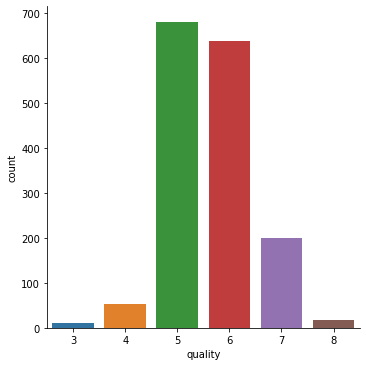

In [ ]:
sns.catplot(x='quality',data=wineQuality_dataset,kind = 'count')

volatile acidity vs Quality

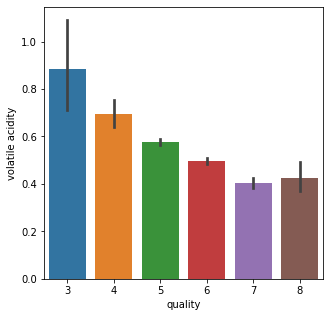

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data = wineQuality_dataset)

citric acid vs quality

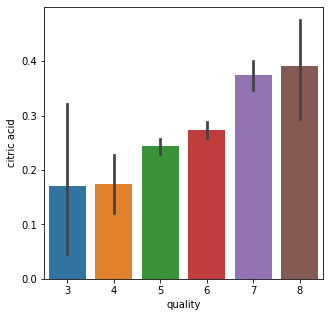

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data = wineQuality_dataset)

 residual sugar vs quality

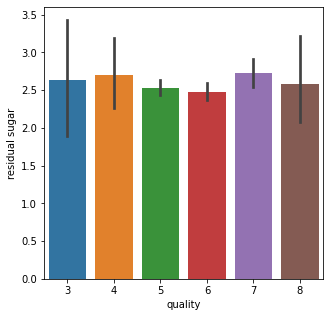

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data = wineQuality_dataset)

alcohol vs quality

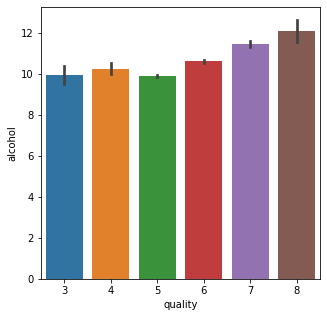

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data = wineQuality_dataset)

pH vs quality

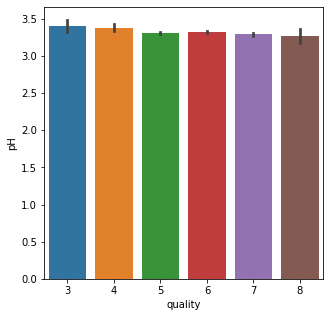

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data = wineQuality_dataset)

In [ ]:
wineQuality_dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

classify as good or bad wine as per quality 

In [ ]:

#bad means it lies in quality in range 0 ,3
#good means it lies in quality in range 7,8
wineQuality_dataset['quality'] = wineQuality_dataset['quality'].apply(lambda x : 1 if x > 6 else 0)
#wineQuality_dataset.head()
wineQuality_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


calculating no.good and bad wine

In [ ]:
print(wineQuality_dataset['quality'].value_counts())

0    1382
1     217
Name: quality, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


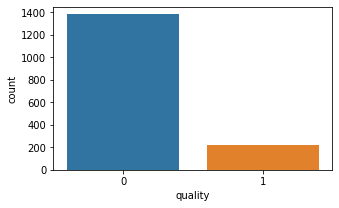

In [ ]:
#plot the bar graph
fig = plt.figure(figsize=(5,3))
sns.countplot(wineQuality_dataset['quality'])

correlational matrix




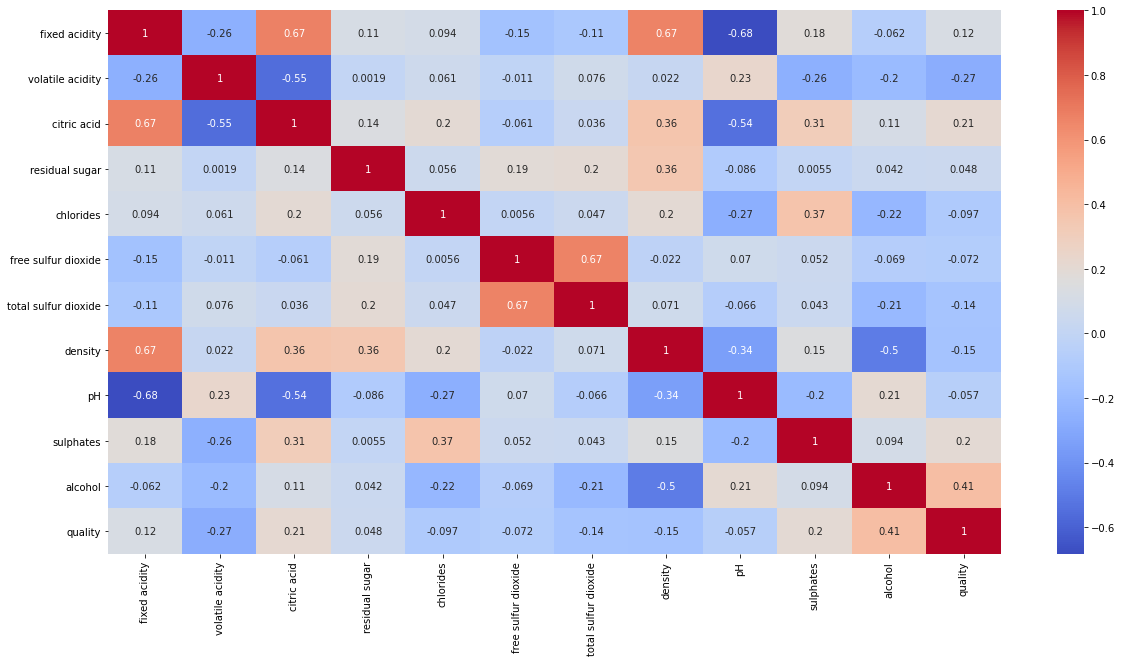

In [ ]:
corr = wineQuality_dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap= 'coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

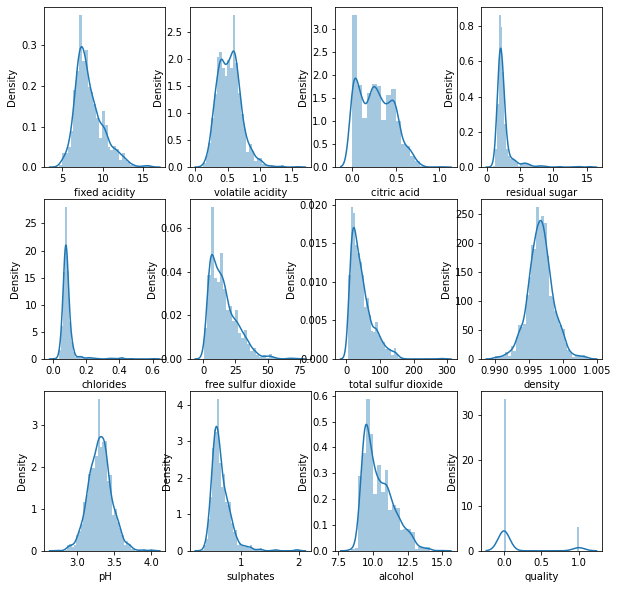

In [ ]:
plt.figure(figsize=(10,10))
pltnum=1

for columns in wineQuality_dataset:
    if pltnum <=12:
        ax=plt.subplot(3,4,pltnum)
        sns.distplot(wineQuality_dataset[columns])
    pltnum=pltnum+1


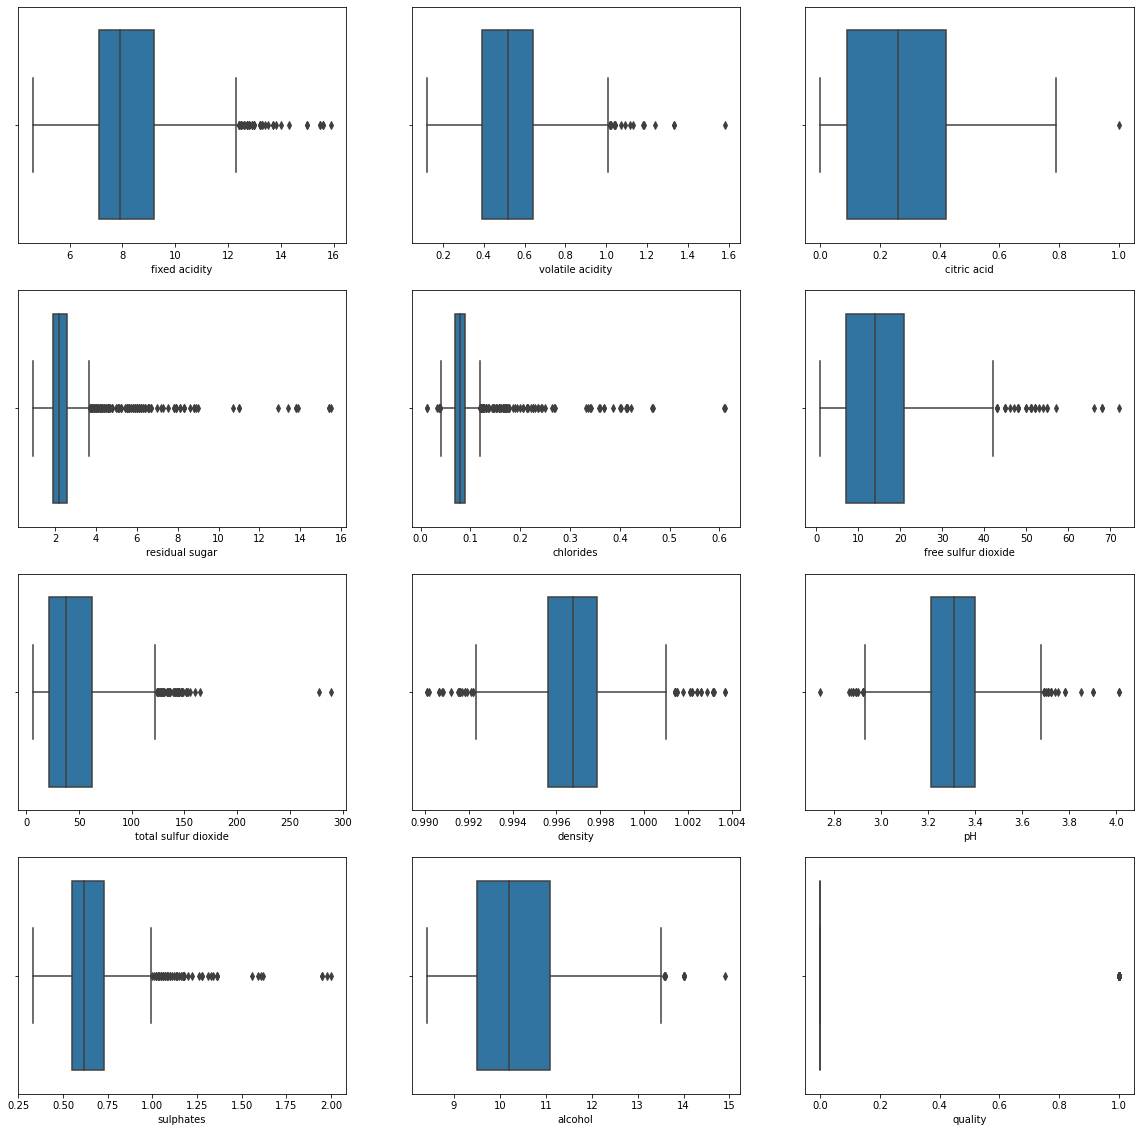

In [ ]:
plt.figure(figsize=(20,20))
pltnum=1
for columns in wineQuality_dataset:
    if pltnum <= 12:
        ax=plt.subplot(4,3,pltnum)
        sns.boxplot(x=wineQuality_dataset[columns])
    pltnum=pltnum+1

In [ ]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
  x_train , x_test, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
  #train the model
  model.fit(x_train , y_train )
  print('Accuracy:',model.score(x_test , y_test)*100)

  #cross-validation 
  score = cross_val_score(model, x ,y, cv=5)
  print('cv Score:',np.mean(score)*100)

In [ ]:
conditions = [
              
        (wineQuality_dataset['quality'] >= 7),
        (wineQuality_dataset['quality'] <= 4)

]

rating = ['superior','inferior']
wineQuality_dataset['rating'] = np.select(conditions,rating ,default='fine')
wineQuality_dataset.rating.value_counts()

inferior    1599
Name: rating, dtype: int64

In [ ]:
wineQuality_dataset.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
inferior,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.13571


Baseline model

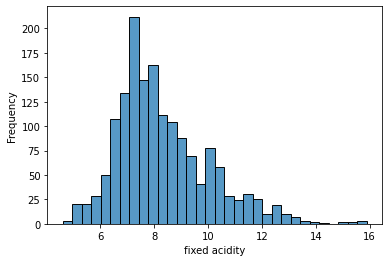

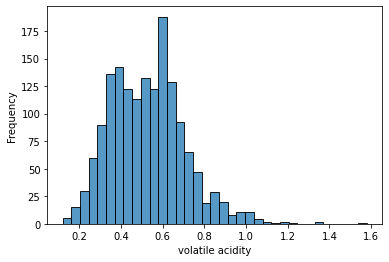

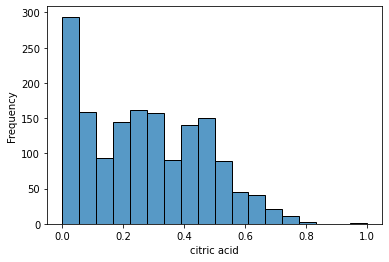

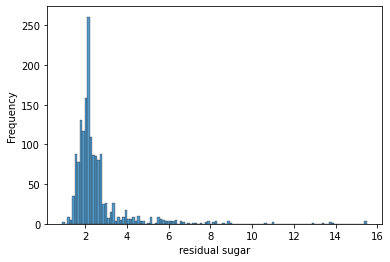

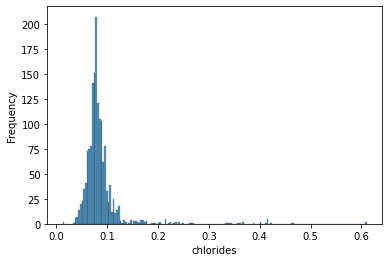

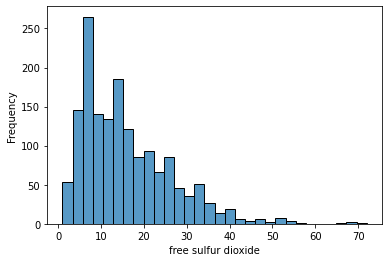

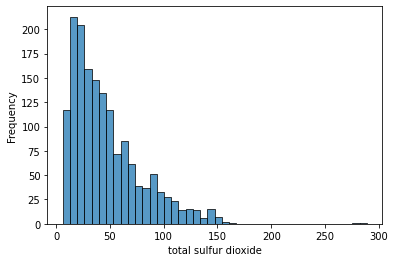

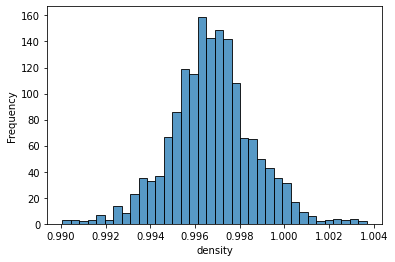

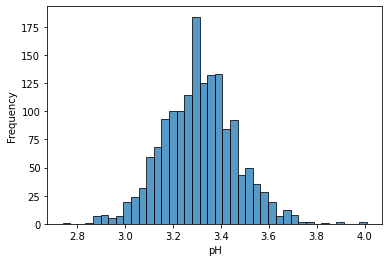

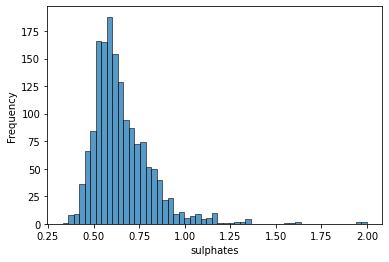

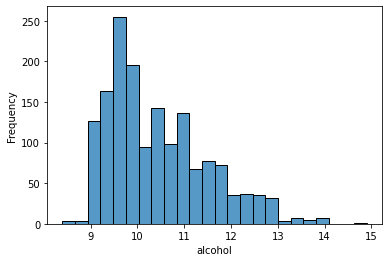

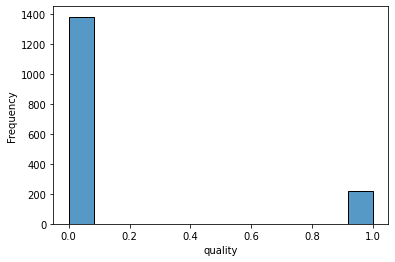

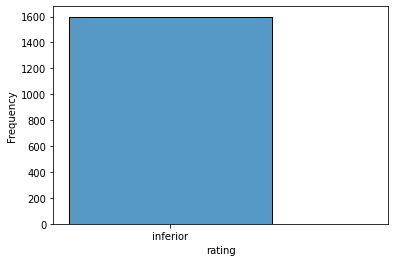

In [ ]:
def histPlot(col):
    sns.histplot(x=col, data=wineQuality_dataset)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
for col in wineQuality_dataset.columns:
    histPlot(col)

#Thank You
